# Pergunta 19

### Qual a relação do número de concluintes de cursos de graduação presencial x à distância, por região?

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
curso_column = ["QT_CONCLUINTE_TOTAL", "CO_IES", "TP_MODALIDADE_ENSINO", "CO_CINE_ROTULO", "CO_CURSO"]
curso = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Curso.csv", index_col=False, header=0, usecols=curso_column, dtype={"QT_CONCLUINTE_TOTAL": float})


In [101]:
ies_column = ["CO_IES", "CO_REGIAO"]
ies = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Ies.csv", index_col=False, header=0, usecols=ies_column)

In [102]:
ies["CO_REGIAO"] = ies.CO_REGIAO.replace([1,2,3,4,5], ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]) #Facilita leitura do gráfico

In [103]:
curso = curso.merge(ies, on="CO_IES", how='left') #Possibilita que verifiquemos em qual estado está a IES na qual o curso é oferecido

In [104]:
curso_pres = curso[curso["TP_MODALIDADE_ENSINO"] == 1] #Filtra para cursos presenciais
 
curso_dist = curso[curso["TP_MODALIDADE_ENSINO"] == 2] #Filtra para cursos a distância

O campo "QT_CONCLUINTE_TOTAL" informa quantos alunos concluintes temos por cada curso

CO_REGIAO
Centro-Oeste     82512.0
Nordeste        194370.0
Norte            64759.0
Sudeste         449664.0
Sul             142732.0
Name: QT_CONCLUINTE_TOTAL, dtype: float64


Text(0.5, 1.0, 'Presencial')

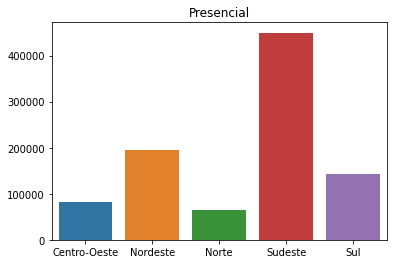

In [140]:
soma = curso_pres.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum() 
print(soma)

sns.barplot(x=list(soma.keys()), y=list(dict(soma).values()))
plt.title("Presencial")

CO_REGIAO
Centro-Oeste     24333.0
Nordeste          9373.0
Norte              479.0
Sudeste         123147.0
Sul             158707.0
Name: QT_CONCLUINTE_TOTAL, dtype: float64


Text(0.5, 1.0, 'À distância')

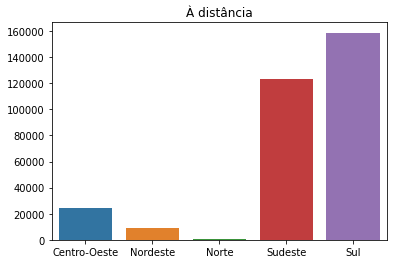

In [142]:
soma = curso_dist.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum()
print(soma)

sns.barplot(x=list(soma.keys()), y=list(dict(soma).values()))
plt.title("À distância")

## Quantidade de alunos concluintes por curso, por região. A ideia é verificar se existem muitos profissionais de uma determinada área para a população

### Fonte para a população de cada região: https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2021/estimativa_dou_2021.pdf

In [108]:
cine = cine_columns = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_columns)
curso = curso.merge(cine, on="CO_CINE_ROTULO", how='left')

In [110]:
pop_per_region = {'Norte': 18906962, 'Nordeste': 57667842, 'Sudeste': 89632912, 'Sul': 30402587, 'Centro': 16707336}

Digite qual curso deseja descobrir em quantos lugares é ofertado
Curso digitado: Direito

Concluintes por habitante:
CO_REGIAO
Centro-Oeste    0.000864
Nordeste        0.000450
Norte           0.000461
Sudeste         0.000579
Sul             0.000665
Name: QT_CONCLUINTE_TOTAL, dtype: float64


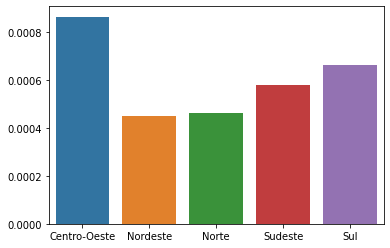

In [136]:
print("Digite qual curso deseja descobrir em quantos lugares é ofertado")
nome_curso_consultado = str(input())
print("Curso digitado:", nome_curso_consultado)

if nome_curso_consultado not in curso.NO_CINE_ROTULO.unique():
   print("\nCurso não encontrado. Favor verificar a lista de cursos válidos!")
else:
   print("\nConcluintes por habitante:")
   concluintes_curso = curso[curso.NO_CINE_ROTULO == nome_curso_consultado]
   concluintes_curso_per_region = concluintes_curso.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum()
   concluintes_curso_per_region.Norte = concluintes_curso_per_region.Norte/pop_per_region["Norte"]
   concluintes_curso_per_region.Nordeste = concluintes_curso_per_region.Nordeste/pop_per_region["Nordeste"]
   concluintes_curso_per_region.Sudeste = concluintes_curso_per_region.Sudeste/pop_per_region["Sudeste"]
   concluintes_curso_per_region.Sul = concluintes_curso_per_region.Sul/pop_per_region["Sul"]
   concluintes_curso_per_region["Centro-Oeste"] = concluintes_curso_per_region["Centro-Oeste"]/pop_per_region["Centro"]
   sns.barplot(x=list(concluintes_curso_per_region.keys()), y=list(dict(concluintes_curso_per_region).values()))
   print(concluintes_curso_per_region)